In [2]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
d = '../data'

In [24]:
f = open(os.path.join(d, 'test_1.txt'))
line = f.readline()
f.close()

img_path, label_path = line.split('\t')
label_path = label_path.strip()

img_path = '../data/floorplan_image/train/0023.jpg'
label_path = '../data/floorplan_representation/train/0023.txt' 

#img_path = '../data/floorplan_image/test/0031.jpg'
#label_path = '../data/floorplan_representation/test/0031.txt' 

print(img_path, label_path)

../data/floorplan_image/train/0023.jpg ../data/floorplan_representation/train/0023.txt


In [25]:
def draw_label(img):
    with open(label_path) as f:
        f = f.readlines()
    for l in f:
        l = l.split('\t')
        p0, p1, s = (int(l[0]), int(l[1])), (int(l[2]), int(l[3])), l[4]
        if s != 'wall':
            continue
        #print(l)
        for p in [p0, p1]:
            img = cv2.circle(img, p, 1, (255, 0, 0), 5)
    return img

def draw_ps(img, ps):
    for p in ps:
        if len(p) > 2:
            p = tuple(map(int, p[:2]))
        img = cv2.circle(img, p, 1, (255, 0, 0), 5)
    return img

def draw_ps2(img, ps):
    print('total points: %d' % len(ps))
    for p in ps:
        img = cv2.circle(img, (int(p[0]), int(p[1])), 1, (255, 0, 0), 5)
    return img

def draw_recs(recs):
    img = np.zeros((256, 256), dtype=int)
    for r in recs: img = cv2.rectangle(img, r[0], r[1], (0,255,0), 3)
    return img

def draw_lines(img, lines):
    #for d, l in zip(ds, lines):
    for l in lines:
        #print(d, l[0], l[1])
        colors = [(255,0,0), (0,255,0), (0,0,255)]
        img = cv2.line(img, tuple(map(int, l[0])), tuple(map(int, l[1])), colors[1], 5)
    return img

def draw_pred(img):
    f = open(os.path.join(d, 'test_res.txt'))
    l = f.readline()
    f.close()
    l = l.split('), (')
    for i, e in enumerate(l):
        if i==0:
            e += ')'
        elif i==len(l)-1:
            e = '(' + e.strip()
        else:
            e = '(' + e + ')'
        x = e.index(')')
        h, v = e[2:x].split(',')
        h, v = int(h.strip()), int(v.strip())
        #print(e, h, v)
        img = cv2.circle(img, (h, v), 1, (0, 255, 0), 5)
    return img

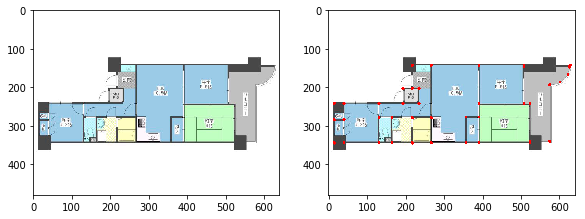

In [26]:
img = cv2.imread(os.path.join(d, img_path))
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(draw_label(img))

#plt.subplot(133)
#plt.imshow(draw_pred(img))

plt.show()

In [27]:
ps2 = [(228.5185185185185, 77.77777777777777), (252.0, 59.5), ]
len(ps2)

2

total points: 2


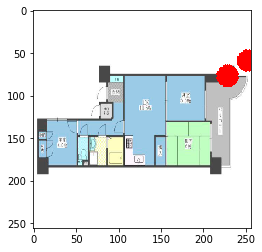

In [29]:
img = cv2.imread(img_path)
img = cv2.resize(img, (256, 256))
img = draw_ps2(img, ps2)
plt.imshow(img)